In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
import os
from dotenv import load_dotenv
from mymodule import myfunc as mf
load_dotenv()
imgout = os.environ["imgout"]
root_dir = os.environ["root_dir"]
indir = imgout + "77AVS/"
# outdir = "../imgout/AVSsplit/"
outdir  = "../imgout/77AVSsplit1/"


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [4]:
#o点が見えるように分けた 77AVSsplit1
sep = [[120,440],[380,700],[630,950],[890,1210],[1200,1520],[1460,1780],[1720,2040],[1980,2300],[2240,2560]]

#X点が見えるように分けた 77AVSsplit2
# sep = [[270,590],[520,840],[770,1090],[1000,1320],[1320,1640],[1580,1900],[1890,2210],[2100,2420],[2360,2680]]
sepy = [330,650]
for path in glob.glob(f"{indir}*.jpg"):
# for path in [f"{indir}img00_00554.jpg"]:
    print(path)        
    im = cv2.imread(path)
    name = os.path.basename(path)
    for s in range(len(sep)):
        separated_im = im[sepy[0]:sepy[1],sep[s][0]:sep[s][1]]
        cv2.imwrite(outdir + f"{s}/{s}_{name}", separated_im)
for s in range(len(sep)):
    for path in glob.glob(f"{outdir}{s}"):
        f = open(f"{path}/description_{s}.txt", mode = "w")
        f.write(f"このファイルは{os.path.basename(os.path.dirname(indir))}{im.shape}を\n X{sep[s][0]}:{sep[s][1]}\n Y{sepy[0]}:{sepy[1]}\nで切り取った")
        f.close()

C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00200.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00201.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00202.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00203.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00204.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00205.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00206.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00207.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00208.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00209.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00210.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00211.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00212.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00213.jpg
C:/Users/TsugiKawa/D

In [31]:


#o点が見えるように分けた 77AVSsplit1
avssep = [[120,440],[380,700],[630,950],[890,1210],[1200,1520],[1460,1780],[1720,2040],[1980,2300],[2240,2560]]
#X点が見えるように分けた 77AVSsplit2
# avssep = [[270,590],[520,840],[770,1090],[1000,1320],[1320,1640],[1580,1900],[1890,2210],[2100,2420],[2360,2680]]
def change_sepx(xrange:list):
    res = [0,0]
    for i in range(2):
        res[i] = mf.AVSlat2bilat(77, [xrange[i],0])[0]
    return res
tempsepx = list(map(change_sepx, avssep))

def change_sepy(xrange:list):
    res = [0,0]
    for i in range(2):
        res[i] = mf.AVSlat2bilat(77, [0,xrange[i]])[1]
    return res
sepy = [[330,650]]
tempsepy = list(map(change_sepy, sepy))

print(tempsepx)
print(tempsepy)


#snap77 を分ける、AVSとの紐付け

[[8.694915254237287, 43.474576271186436], [36.95338983050847, 71.73305084745762], [64.125, 98.90466101694915], [92.38347457627118, 127.16313559322033], [126.07627118644066, 160.8559322033898], [154.33474576271186, 189.114406779661], [182.59322033898303, 217.37288135593218], [210.85169491525423, 245.63135593220338], [239.1101694915254, 273.8898305084746]]
[[283.2236842105263, 714.8026315789473]]


In [4]:
#koreyatte
import numpy as np
indir = "../snap/snap77/"
outdir  = "../imgout/snap77split1/"###mkdirして
targets = ["magfieldx","magfieldy"]
sep = [[8, 43],
 [36, 71],
 [64, 99],
 [92, 127],
 [126, 161],
 [154, 189],
 [182, 217],
 [210, 245],
 [239, 274]]

sepy = [283, 715]
for target in targets:
    # for path in glob.glob(f"{indir}{target}/*/*"):
    for path in [f"{indir}{target}/14/{target}.01.14"]:
        print(path)        
        im = mf.load(path)
        name = os.path.basename(path)
        for s in range(len(sep)):
            separated_im = im[sepy[0]:sepy[1],sep[s][0]:sep[s][1]]
            np.save(f"{outdir}{target}/{s}/{s}_{name}", separated_im)
    for s in range(len(sep)):
        for path in glob.glob(f"{outdir}{s}"):
            f = open(f"{path}/description_{s}.txt", mode = "w")
            f.write(f"このファイルは{os.path.basename(os.path.dirname(indir))}{im.shape}を\n X{sep[s][0]}:{sep[s][1]}\n Y{sepy[0]}:{sepy[1]}\nで切り取った")
            f.close()



../snap/snap49/magfieldx/14/magfieldx.01.14
../snap/snap49/magfieldy/14/magfieldy.01.14


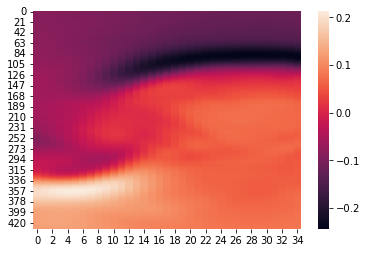

In [30]:
mf.show(np.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap77split1\2\2_magfieldx.01.14.npy"))

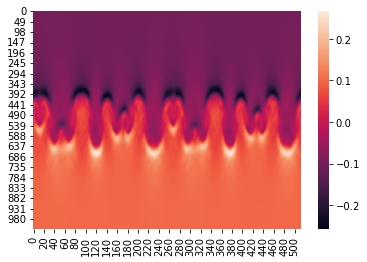

In [23]:
mf.show(mf.load(mf.gen_snap_path("magfieldx", 1,14,77)))

In [25]:
def change_sepy(xrange:list):
    res = [0,0]
    for i in range(2):
        res[i] = mf.AVSlat2bilat(77, [0,xrange[i]])[1]
    return res
sepy = [[330,650]]
sep = list(map(change_sepy, sepy))

In [ ]:
mf.show(np.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap77split1\2\2_magfieldx.01.14.npy"))

In [2]:
x = r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap49split1\magfieldx\0\0_magfieldx.01.14.npy"
y = r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap49split1\magfieldy\0\0_magfieldy.01.14.npy"
mf.ohno_stream(x,y, "test.bmp")



# mf.show(np.load(x))

# mf.ohno_stream(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap49split1\2\2_magfieldx.04.14.npy",r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap49split1\2\2_magfieldx.04.14.npy", "test.bmp")

['C:/Users/lkxl1/OneDrive/デスクトップ/research/src/mymodule/StreamLines/FieldLines.exe', 'xtemp_ohnostrm_reading7340', 'ytemp_ohnostrm_reading8486', 'test.bmp', '35', '432']


CompletedProcess(args=['C:/Users/lkxl1/OneDrive/デスクトップ/research/src/mymodule/StreamLines/FieldLines.exe', 'xtemp_ohnostrm_reading7340', 'ytemp_ohnostrm_reading8486', 'test.bmp', '35', '432'], returncode=0)